In [13]:
#Reload module:
import importlib
from data_help import data_loader

importlib.reload(data_loader)

<module 'data_help.data_loader' from 'C:\\Users\\victo\\Aarhus universitet\\Test - Dokumenter\\Elektronik\\Noter Elektronik\\Elektronik 6. semester\\ITMAL\\ITMAL - Exercises\\Lektion5\\Projekt\\data_help\\data_loader.py'>

# Question a
Plot fordelingen af median_income. Find også spredning, middelværdi og median.
## Implementering:

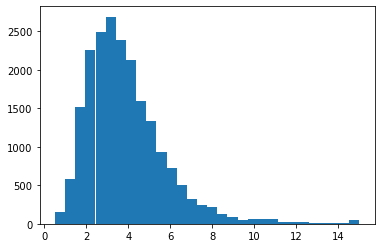

Spread of median income: 1.899775694574878
Mean of median income: 3.8706710029070246
Median of median income: 3.5347999999999997


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from data_help import data_loader

data = data_loader.load_housing_data()


labels = data_loader.load_housing_labels()
median_income = data[:,7]


plt.hist(median_income, 30)
plt.show()
print(f"Spread of median income: {np.std(median_income)}")
print(f"Mean of median income: {np.mean(median_income)}")
print(f"Median of median income: {np.median(median_income)}")

In [19]:
import pandas as pd
from data_help import data_loader

data = pd.read_csv(data_loader.get_path(), sep=',')
data["median_income"].hist()
data["median_income"].std()

## Kommentarer:
-

# Question b
Er der forskel på median og middelværdi af median_income ? Hvilken af de to beskriver bedst en ”almindelig families indkomst” og hvorfor ?

## Kommentarer:

Ja der er en forskel. Medianen beskriver antageligvis 'bedst' en almindelig families indkomst idet gennemsnittet ikke trækkes
op af mange-millionærer, milliarderer osv.


# Question c
Fit en normalfordeling til data og plot histogrammet – passer de to ?
## Implementering:

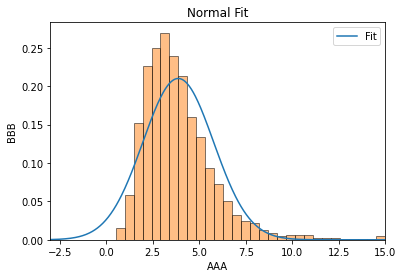

In [24]:
%reset -f
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np
#Load data
from data_help import data_loader
data = data_loader.load_housing_data()
median_income = data[:,7]

#Standard deviation and mean

std = np.std(median_income)
mean = np.mean(median_income)
# Plotting
domain = np.linspace(-3, np.max(median_income),500)
plt.plot(domain, norm.pdf(domain,mean,std), label= "Fit")
plt.hist(median_income, edgecolor='black', alpha=.5,density=True, bins=30)
plt.title("Normal Fit")
plt.xlim(-3,  np.max(median_income))
plt.legend()
plt.show()


## Kommentarer:


-



# Question d
Er der sammenhæng imellem median_house_value og median_income ? Lav korrelationsplot.
## Implementering:

[[1.         0.98895165 0.99803259 ... 0.99422717 0.99553677 0.99290457]
 [0.98895165 1.         0.99624277 ... 0.99910978 0.99846262 0.9995412 ]
 [0.99803259 0.99624277 1.         ... 0.99888906 0.9993681  0.99831147]
 ...
 [0.99422717 0.99910978 0.99888906 ... 1.         0.99991192 0.99992897]
 [0.99553677 0.99846262 0.9993681  ... 0.99991192 1.         0.99968273]
 [0.99290457 0.9995412  0.99831147 ... 0.99992897 0.99968273 1.        ]]


Text(0, 0.5, '10000 USD($)')

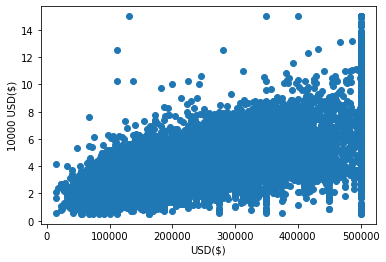

In [56]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt

#Load data
from data_help import data_loader
data = data_loader.load_housing_data()
labels = data_loader.load_housing_labels()
median_income = data[:,7]
median_house_value = data[:,8]

#Plot

plt.scatter(median_house_value, median_income)

plt.xlabel("USD($)")
plt.ylabel("10000 USD($)")

## Kommentarer:


-


# Question e
Hvad er 5% og 95% percentilerne af median_house_value ? (dvs. grænserne for 5% laveste og højeste).
Plot også fordelingen af median_house_value.
Kommentér på realismen af max-værdi og 95% percentil – foreslå gerne en løsning til hvad man kan gøre ved dette, hvis man skal have mere realistiske data.
## Implementering:

5th percentile: {1} 66200.0
95th percentile: {1} 489809.9999999998


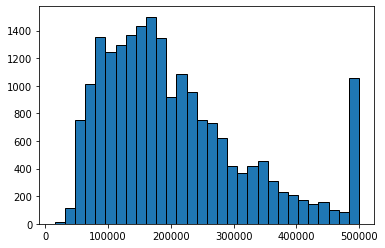

In [63]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
#Load data
from data_help import data_loader
data = data_loader.load_housing_data()

median_house_value = data[:,8]

print("5th percentile: {1}", np.percentile(median_house_value,5))
print("95th percentile: {1}", np.percentile(median_house_value,95))

plt.hist(median_house_value, 30, edgecolor='black')
plt.show()


## Kommentarer:

(Fra bogen s.85 i pdf)

2. The housing median age and the median house value were also
capped. The latter may be a serious problem since it is your target
attribute (your labels). Your Machine Learning algorithms may learn
that prices never go beyond that limit. You need to check with your
client team (the team that will use your system’s output) to see if this
is a problem or not. If they tell you that they need precise predictions
even beyond $500,000, then you have two options:

a. Collect proper labels for the districts whose labels were
capped.
b. Remove those districts from the training set (and also from
the test set, since your system should not be evaluated poorly
if it predicts values beyond $500,000).

-